In [1]:
from src.common.globals import G, split_train_valid_test, calc_errors, save_errors_to_table, get_naive_forecast
from src.data.get_data import CSVsLoader
from src.common.analysis_and_plots import Visualize as V
from src.features.build_features import FeatureEngineering as FE

import pandas as pd
import os
import joblib
from src.common.logs import setup_logging
import logging

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

PROJECT_PATH = G.get_project_root()
DATA_DIR_PROCESSED = os.path.join(PROJECT_PATH, r'data\03_processed\daily_full')

config = {
    'AV': {
        'key': '',
        'ticker': 'MSFT',
        'outputsize': 'full',
        'key_adjusted_close': 'Adj Close',
        'key_volume': 'Volume',
    },
    'data': {
        'train_size': 0.85,
        'valid_size': 0.145,
        'test_size': 0.005,
    }, 
    'model': {
        'name': 'ARIMA', 
        'window': 20,
    },
}

logger = setup_logging(logger_name=__name__,
                        console_level=logging.INFO, 
                        log_file_level=logging.INFO)

2023-09-08 15:02:15 - src.data.get_data - INFO - Loaded "..\P7-Trading-Bot\data\03_processed\daily_full\MSFT-daily-full.csv". Number data points 5995. From "1999-11-01 00:00:00" to "2023-08-29 00:00:00"


DatetimeIndex(['1999-11-01', '1999-11-02', '1999-11-03', '1999-11-04',
               '1999-11-05', '1999-11-08', '1999-11-09', '1999-11-10',
               '1999-11-11', '1999-11-12',
               ...
               '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-21',
               '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
               '2023-08-28', '2023-08-29'],
              dtype='datetime64[ns]', name='Date', length=5995, freq=None)
Scaling done
DatetimeIndex(['1999-11-01', '1999-11-02', '1999-11-03', '1999-11-04',
               '1999-11-05', '1999-11-08', '1999-11-09', '1999-11-10',
               '1999-11-11', '1999-11-12',
               ...
               '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-21',
               '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
               '2023-08-28', '2023-08-29'],
              dtype='datetime64[ns]', name='Date', length=5995, freq=None)


2023-09-08 15:02:15 - src.common.analysis_and_plots - INFO - Plot "ARIMA-1 by 2-2023-09-08_15-02-15.png" saved to "D:\Study 2018 and later\Mignimind Bootcamp\Code\P7-Trading-Bot\figures\ARIMA-1 by 2-2023-09-08_15-02-15.png"


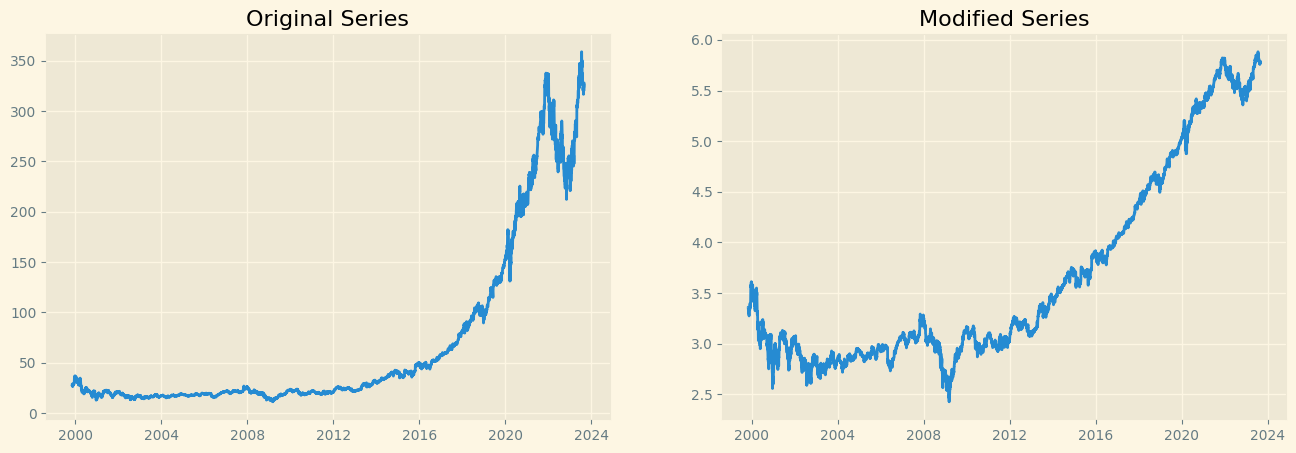

In [2]:
# Load data
df = CSVsLoader(ticker=config['AV']['ticker'], directory=DATA_DIR_PROCESSED)
# Log Scale data
df = FE.log_scale(df, column=config['AV']['key_adjusted_close'])
# Plot
print('Scaling done')
# change index to datetime
df.index = pd.to_datetime(df.index)

V.plot_1_by_2(df, model_name=config['model']['name'],
                col_before=config['AV']['key_adjusted_close'], 
                col_after=config['AV']['key_adjusted_close'] + ' - log')
# Create features
df = FE.create_lags(df, column=config['AV']['key_adjusted_close'], lag=config['model']['window'])